In [2]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
from sklearn import preprocessing



# Climate Data

In [3]:
climate = pd.read_csv("Data/2023_scm_climate.csv")
climate = clean_columns(climate)
climate["date"] = pd.to_datetime(climate["date"], format="%m/%d/%y")
climate["week"] = climate["date"].dt.strftime("%U").astype(int)
# climate


# Weekly Climate Data

In [4]:
one_week_climate = pd.read_csv("Data/wire_mesh_one_week_climate.csv")
two_week_climate = pd.read_csv("Data/wire_mesh_two_week_climate.csv")


# Soil Data

In [6]:
soil = pd.read_csv("Data/2023_scm_soil.csv")
soil = clean_columns(soil)
# soil

dairy_one = pd.read_csv('Data/2023_dairy_one.csv')
dairy_one = clean_columns(dairy_one)
#dairy_one

# Management Data

In [7]:
management = pd.read_csv("Data/2023_management.csv")
management = clean_columns(management)
# management


# Landscape Data

## 500m Radius

In [8]:
cdl_500 = pd.read_csv("Data/Landscape/cdl_500_history.csv")
cdl_500 = cdl_500.drop("Unnamed: 0", axis=1)

## 1000m Radius

In [9]:
cdl_1000 = pd.read_csv("Data/Landscape/cdl_1000_history.csv")
cdl_1000 = cdl_1000.drop("Unnamed: 0", axis=1)


## 2000m Radius

In [10]:
cdl_2000 = pd.read_csv("Data/Landscape/cdl_2000_history.csv")
cdl_2000 = cdl_2000.drop("Unnamed: 0", axis=1)


## 3000m Radius

In [11]:
cdl_3000 = pd.read_csv("Data/Landscape/cdl_3000_history.csv")
cdl_3000 = cdl_3000.drop("Unnamed: 0", axis=1)


# Wire Mesh Data

In [12]:
wire_mesh = pd.read_csv("Data/2023_wire_mesh.csv")
wire_mesh = clean_columns(wire_mesh)
wire_mesh["number_wireworm"] = (
    wire_mesh["number_wireworm"].replace(">10", 10).astype(float)
)
wire_mesh["total_phorid_maggots"] = (
    wire_mesh["total_phorid_maggots"].replace(">10", 10).astype(float)
)
wire_mesh["total_phorid_pupae"] = (
    wire_mesh["total_phorid_pupae"].replace(">10", 10).astype(float)
)

wire_mesh = wire_mesh.loc[wire_mesh["project"] == "R"]
# wire_mesh


# Wire Mesh Intake

In [13]:
wire_mesh_intake = pd.read_csv("Data/2023_wire_mesh_intake.csv")
wire_mesh_intake = clean_columns(wire_mesh_intake)
wire_mesh_intake = wire_mesh_intake.loc[wire_mesh_intake["project"] == "R"]
# wire_mesh_intake


In [14]:
wire_mesh = wire_mesh.merge(
    wire_mesh_intake[
        [
            "container_number",
            "container_type",
            "collection_date",
            "record_id",
            "project",
        ]
    ],
    on=["container_number", "project"],
    how="left",
)
# wire_mesh


Get maximum maggot count per container.

In [15]:
index = wire_mesh.groupby("container_number")["total_scm_maggots"].idxmax()
scm_maggot_counts = wire_mesh.loc[index]
scm_maggot_counts = scm_maggot_counts[
    [
        "id",
        "container_number",
        "project",
        "number_seeds",
        "total_scm_maggots",
        "collection_date",
        "record_id",
    ]
]
scm_maggot_counts


,id,container_number,project,number_seeds,total_scm_maggots,collection_date,record_id
36,37,3001,R,10.0,0.0,4/18/23,POV_DUN
42,43,3002,R,11.0,1.0,4/18/23,POV_DUN
18,19,3003,R,5.0,0.0,4/18/23,DIP_CUR
24,25,3004,R,9.0,0.0,4/18/23,DIP_CUR
21,22,3005,R,10.0,0.0,4/18/23,DIP_PAT
...,...,...,...,...,...,...,...
825,5095,5114,R,10.0,0.0,6/12/23,SMI_KEL
799,5033,5115,R,NaN,2.0,6/13/23,SMI_JOH_2
828,5101,5116,R,10.0,0.0,6/13/23,SMI_JOH_2
807,5041,5117,R,10.0,0.0,6/12/23,SMI_HOL


In [16]:
bean_containers = wire_mesh[wire_mesh["seed_type"] == "Bean"]
bean_containers = bean_containers[["seed_type", "container_number"]]

corn_containers = wire_mesh[wire_mesh["seed_type"] == "Corn"]
corn_containers = corn_containers[["seed_type", "container_number"]]

container_numbers = pd.concat([bean_containers, corn_containers])


In [17]:
index = wire_mesh.groupby("container_number")["total_scm_pupae"].idxmax()
scm_pupae_counts = wire_mesh.loc[index]
scm_pupae_counts = scm_pupae_counts[["container_number", "total_scm_pupae"]]


In [18]:
index = wire_mesh.groupby("container_number")["number_wireworm"].idxmax()
wireworm_counts = wire_mesh.loc[index]
wireworm_counts = wireworm_counts[["container_number", "number_wireworm"]]


In [19]:
index = wire_mesh.groupby("container_number")["total_phorid_maggots"].idxmax()
phorid_maggot_counts = wire_mesh.loc[index]
phorid_maggot_counts = phorid_maggot_counts[
    ["container_number", "total_phorid_maggots"]
]


In [20]:
index = wire_mesh.groupby("container_number")["total_phorid_pupae"].idxmax()
phorid_pupae_counts = wire_mesh.loc[index]
phorid_pupae_counts = phorid_pupae_counts[["container_number", "total_phorid_pupae"]]


In [21]:
index = wire_mesh.groupby("container_number")["scm_seeds"].idxmax()
scm_seeds = wire_mesh.loc[index]
scm_seeds = scm_seeds[["container_number", "scm_seeds"]]


In [22]:
index = wire_mesh.groupby("container_number")["other_seeds"].idxmax()
other_seeds = wire_mesh.loc[index]
other_seeds = other_seeds[["container_number", "other_seeds"]]


In [23]:
scm_maggot_counts = scm_maggot_counts.merge(container_numbers, on="container_number")
scm_counts = scm_maggot_counts.merge(scm_pupae_counts, on="container_number")
wire_mesh_counts = scm_counts.merge(wireworm_counts, on="container_number")
wire_mesh_counts = wire_mesh_counts.merge(phorid_maggot_counts, on="container_number")
wire_mesh_counts = wire_mesh_counts.merge(scm_seeds, on="container_number")
wire_mesh_counts = wire_mesh_counts.merge(other_seeds, on="container_number")
wire_mesh_counts

# wire_mesh_counts.to_csv('Data/2023_wire_mesh_clean.csv')


,id,container_number,project,number_seeds,total_scm_maggots,collection_date,record_id,seed_type,total_scm_pupae,number_wireworm,total_phorid_maggots,scm_seeds,other_seeds
0,37,3001,R,10.0,0.0,4/18/23,POV_DUN,Corn,0,1.0,0.0,0.0,2.0
1,43,3002,R,11.0,1.0,4/18/23,POV_DUN,Bean,0,2.0,10.0,1.0,1.0
2,19,3003,R,5.0,0.0,4/18/23,DIP_CUR,Bean,17,0.0,0.0,0.0,1.0
3,25,3004,R,9.0,0.0,4/18/23,DIP_CUR,Corn,0,2.0,0.0,0.0,1.0
4,22,3005,R,10.0,0.0,4/18/23,DIP_PAT,Corn,0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,5095,5114,R,10.0,0.0,6/12/23,SMI_KEL,Corn,0,0.0,0.0,0.0,0.0
278,5033,5115,R,NaN,2.0,6/13/23,SMI_JOH_2,Bean,0,0.0,0.0,0.0,4.0
279,5101,5116,R,10.0,0.0,6/13/23,SMI_JOH_2,Corn,0,0.0,0.0,0.0,0.0
280,5041,5117,R,10.0,0.0,6/12/23,SMI_HOL,Bean,0,0.0,0.0,0.0,2.0


In [24]:
wire_mesh_counts["total_scm"] = (
    wire_mesh_counts["total_scm_maggots"] + wire_mesh_counts["total_scm_pupae"]
)


In [70]:
#wire_mesh_counts["collection_date"] = pd.to_datetime(
#    wire_mesh_counts["collection_date"], format="%m/%d/%y"
#)

# Create Table - All Features

In [25]:
wire_mesh_features = wire_mesh_counts.merge(
    one_week_climate, on=["record_id", "collection_date"]
)
wire_mesh_features = wire_mesh_features.merge(two_week_climate, on=["record_id", "collection_date"])
wire_mesh_features = wire_mesh_features.merge(soil, on='record_id')
wire_mesh_features = wire_mesh_features.merge(management, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
wire_mesh_features = wire_mesh_features.merge(cdl_500, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
wire_mesh_features = wire_mesh_features.merge(cdl_1000, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
wire_mesh_features = wire_mesh_features.merge(cdl_2000, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
wire_mesh_features = wire_mesh_features.merge(cdl_3000, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
wire_mesh_features = wire_mesh_features.merge(soil, on='record_id')
wire_mesh_features = wire_mesh_features.merge(dairy_one, on='record_id')

wire_mesh_features.to_csv('Data/2023_wire_mesh_features.csv')

# Correlations

## Climate and Wire Mesh Data

In [77]:
wire_mesh_climate = wire_mesh_counts.merge(
    one_week_climate, on=["record_id", "collection_date"]
)
wire_mesh_climate = wire_mesh_climate.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
wire_mesh_climate


,id,container_number,project,number_seeds,total_scm_maggots,collection_date,record_id,seed_type,total_scm_pupae,number_wireworm,...,other_seeds,total_scm,min_temp_f_1_week,ave_temp_f_1_week,max_temp_f_1_week,rain_inches_1_week,min_temp_f_2_week,ave_temp_f_2_week,max_temp_f_2_week,rain_inches_2_week
0,37,3001,R,10.0,0.0,4/18/23,POV_DUN,Corn,0,1.0,...,2.0,0.0,43.6750,58.3125,72.9500,1.30,38.460000,51.793333,65.140000,2.84
1,43,3002,R,11.0,1.0,4/18/23,POV_DUN,Bean,0,2.0,...,1.0,1.0,43.6750,58.3125,72.9500,1.30,38.460000,51.793333,65.140000,2.84
2,19,3003,R,5.0,0.0,4/18/23,DIP_CUR,Bean,17,0.0,...,1.0,17.0,43.3125,57.0125,70.7500,1.46,38.533333,50.920000,63.313333,3.60
3,25,3004,R,9.0,0.0,4/18/23,DIP_CUR,Corn,0,2.0,...,1.0,0.0,43.3125,57.0125,70.7500,1.46,38.533333,50.920000,63.313333,3.60
4,22,3005,R,10.0,0.0,4/18/23,DIP_PAT,Corn,0,0.0,...,5.0,0.0,47.4125,61.6875,75.9500,0.86,40.986667,53.880000,66.766667,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,5095,5114,R,10.0,0.0,6/12/23,SMI_KEL,Corn,0,0.0,...,0.0,0.0,48.0750,58.5875,69.0875,0.48,49.493333,62.820000,76.166667,2.04
272,5033,5115,R,NaN,2.0,6/13/23,SMI_JOH_2,Bean,0,0.0,...,4.0,2.0,51.2625,60.9500,70.5750,3.02,52.373333,64.440000,76.480000,3.02
273,5101,5116,R,10.0,0.0,6/13/23,SMI_JOH_2,Corn,0,0.0,...,0.0,0.0,51.2625,60.9500,70.5750,3.02,52.373333,64.440000,76.480000,3.02
274,5041,5117,R,10.0,0.0,6/12/23,SMI_HOL,Bean,0,0.0,...,2.0,0.0,49.6500,59.8250,70.0000,0.66,51.073333,63.846667,76.633333,0.90


In [78]:
wire_mesh_climate_subset = wire_mesh_climate[
    [
        "number_seeds",
        "total_scm_maggots",
        "collection_date",
        "total_scm_pupae",
        "number_wireworm",
        "total_phorid_maggots",
        "scm_seeds",
        "other_seeds",
        "total_scm",
        "min_temp_f_1_week",
        "ave_temp_f_1_week",
        "max_temp_f_1_week",
        "rain_inches_1_week",
        "min_temp_f_2_week",
        "ave_temp_f_2_week",
        "max_temp_f_2_week",
        "rain_inches_2_week",
    ]
]

wire_mesh_climate_subset["collection_date"] = pd.to_datetime(
    wire_mesh_climate_subset["collection_date"], format="%m/%d/%y"
)


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_94035/1780981832.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wire_mesh_climate_subset["collection_date"] = pd.to_datetime(


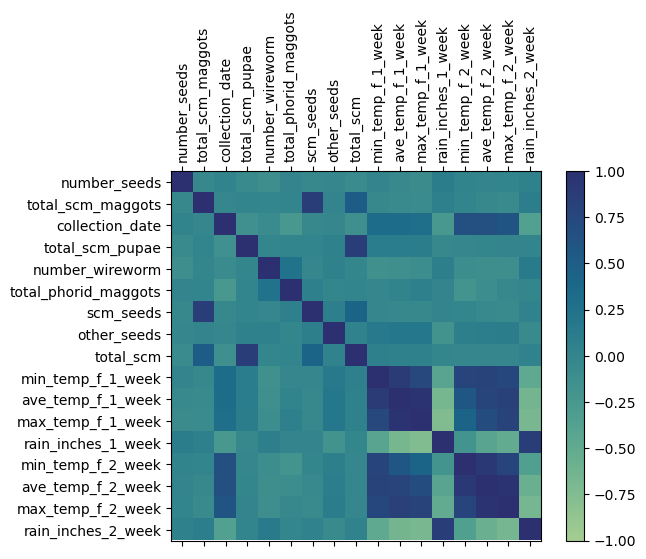

In [79]:
corr = wire_mesh_climate_subset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap="crest", vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(wire_mesh_climate_subset.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(wire_mesh_climate_subset.columns)
ax.set_yticklabels(wire_mesh_climate_subset.columns)
plt.show()


In [80]:
corr.style.background_gradient(cmap="crest").format(precision=2)

,number_seeds,total_scm_maggots,collection_date,total_scm_pupae,number_wireworm,total_phorid_maggots,scm_seeds,other_seeds,total_scm,min_temp_f_1_week,ave_temp_f_1_week,max_temp_f_1_week,rain_inches_1_week,min_temp_f_2_week,ave_temp_f_2_week,max_temp_f_2_week,rain_inches_2_week
number_seeds,1.00,-0.04,0.03,-0.07,-0.13,0.01,-0.04,-0.03,-0.08,0.00,-0.06,-0.09,0.10,0.03,0.01,-0.01,0.05
total_scm_maggots,-0.04,1.00,-0.02,-0.01,-0.01,-0.01,0.85,0.01,0.51,-0.05,-0.08,-0.08,0.06,-0.00,-0.05,-0.07,0.08
collection_date,0.03,-0.02,1.00,-0.15,-0.08,-0.26,-0.05,-0.02,-0.14,0.31,0.31,0.28,-0.26,0.66,0.66,0.60,-0.36
total_scm_pupae,-0.07,-0.01,-0.15,1.00,-0.01,0.01,-0.00,0.04,0.86,0.10,0.10,0.10,-0.05,-0.03,-0.01,0.00,-0.01
number_wireworm,-0.13,-0.01,-0.08,-0.01,1.00,0.23,-0.02,0.05,-0.01,-0.15,-0.14,-0.12,0.07,-0.11,-0.13,-0.13,0.12
total_phorid_maggots,0.01,-0.01,-0.26,0.01,0.23,1.00,0.06,-0.01,0.01,-0.03,0.03,0.06,0.00,-0.19,-0.11,-0.05,-0.01
scm_seeds,-0.04,0.85,-0.05,-0.00,-0.02,0.06,1.00,0.08,0.43,-0.02,-0.04,-0.05,0.00,-0.02,-0.06,-0.07,0.03
other_seeds,-0.03,0.01,-0.02,0.04,0.05,-0.01,0.08,1.00,0.04,0.15,0.18,0.18,-0.18,0.08,0.09,0.10,-0.07
total_scm,-0.08,0.51,-0.14,0.86,-0.01,0.01,0.43,0.04,1.00,0.06,0.05,0.04,-0.01,-0.03,-0.03,-0.03,0.03
min_temp_f_1_week,0.00,-0.05,0.31,0.10,-0.15,-0.03,-0.02,0.15,0.06,1.00,0.88,0.74,-0.41,0.78,0.81,0.75,-0.48


# Soil and Wire Mesh

In [30]:
wire_mesh_counts_soil = wire_mesh_counts.merge(
    soil, on=["record_id"]
)
wire_mesh_counts_soil = wire_mesh_counts_soil.merge(dairy_one, on='record_id')
wire_mesh_counts_soil = wire_mesh_counts_soil.drop(['id', 'container_number', 'project', 'record_id', 'seed_type', 'ny_soils_0', 'ny_soils_01', 'muid', 'hsg', 'hsgw'], axis=1)
wire_mesh_counts_soil["collection_date"] = pd.to_datetime(wire_mesh_counts_soil["collection_date"], format="%m/%d/%y")
wire_mesh_counts_soil.head()

,number_seeds,total_scm_maggots,collection_date,total_scm_pupae,number_wireworm,total_phorid_maggots,scm_seeds,other_seeds,total_scm,hsgint,...,zn_ppm,cu_ppm,mn_ppm,b_ppm,al_ppm,s_ppm,morgan_p_lb_a,morgan_k_lb_a,morgan_ca_lb_a,morgan_mg_lb_a
0,10.0,0.0,2023-04-18,0,1.0,0.0,0.0,2.0,0.0,1,...,2.0,0.8,21.6,0.3,1299,14,1.0,166.4,1383.2,214.9
1,11.0,1.0,2023-04-18,0,2.0,10.0,1.0,1.0,1.0,1,...,2.0,0.8,21.6,0.3,1299,14,1.0,166.4,1383.2,214.9
2,10.0,2.0,2023-05-02,0,0.0,2.0,1.0,2.0,2.0,1,...,2.0,0.8,21.6,0.3,1299,14,1.0,166.4,1383.2,214.9
3,10.0,0.0,2023-05-16,0,0.0,0.0,0.0,1.0,0.0,1,...,2.0,0.8,21.6,0.3,1299,14,1.0,166.4,1383.2,214.9
4,7.0,4.0,2023-05-16,0,1.0,0.0,1.0,0.0,4.0,1,...,2.0,0.8,21.6,0.3,1299,14,1.0,166.4,1383.2,214.9


In [31]:
corr = wire_mesh_counts_soil.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

,number_seeds,total_scm_maggots,collection_date,total_scm_pupae,number_wireworm,total_phorid_maggots,scm_seeds,other_seeds,total_scm,hsgint,muserial,hsga,hsgb,hsgc,hsgd,organic_matter_percent,base_saturation_ca,base_saturation_mg,base_saturation_k,base_saturation_na,base_saturation_h,base_saturation_total,exch_acidity,buffer_p_h,cec,p_h,ca_ppm,p_ppm,mg_ppm,k_ppm,na_ppm,fe_ppm,zn_ppm,cu_ppm,mn_ppm,b_ppm,al_ppm,s_ppm,morgan_p_lb_a,morgan_k_lb_a,morgan_ca_lb_a,morgan_mg_lb_a
number_seeds,1.00,-0.04,0.04,-0.07,-0.13,0.01,-0.04,-0.03,-0.08,-0.05,0.08,-0.05,0.17,-0.15,0.03,-0.04,0.15,0.02,0.05,-0.00,-0.22,0.22,-0.21,-0.06,0.04,0.23,0.05,0.06,0.06,0.10,0.01,-0.04,-0.04,0.09,0.11,0.10,-0.12,-0.13,0.07,0.10,0.05,0.06
total_scm_maggots,-0.04,1.00,-0.02,-0.00,-0.01,-0.00,0.85,0.01,0.51,0.05,-0.13,-0.04,0.03,0.01,-0.01,-0.01,0.02,-0.07,-0.07,0.03,0.03,-0.03,0.01,0.07,0.00,-0.02,0.02,-0.06,-0.06,-0.08,0.02,-0.07,-0.09,-0.07,-0.08,-0.05,0.07,-0.07,-0.03,-0.08,0.02,-0.06
collection_date,0.04,-0.02,1.00,-0.15,-0.09,-0.26,-0.04,-0.04,-0.14,0.01,-0.06,-0.08,0.13,-0.04,-0.08,-0.01,0.08,-0.11,0.01,-0.02,-0.04,0.04,-0.03,-0.02,0.05,0.02,0.06,0.06,-0.05,0.03,0.01,0.07,0.07,0.04,0.03,0.05,-0.08,0.09,0.06,0.03,0.06,-0.05
total_scm_pupae,-0.07,-0.00,-0.15,1.00,-0.01,0.01,-0.00,0.03,0.86,-0.04,0.07,-0.03,-0.01,0.02,0.04,0.03,0.00,-0.00,0.18,0.03,-0.05,0.05,-0.03,0.03,0.02,0.04,0.01,0.10,0.02,0.20,0.03,0.04,0.09,0.18,-0.03,0.04,0.02,0.04,0.08,0.20,0.01,0.02
number_wireworm,-0.13,-0.01,-0.09,-0.01,1.00,0.23,-0.02,0.05,-0.01,-0.04,0.06,0.04,-0.03,-0.02,0.06,0.02,0.07,-0.05,-0.09,-0.08,-0.03,0.03,-0.04,-0.08,0.05,0.04,0.06,-0.00,-0.01,-0.05,-0.02,0.04,-0.01,0.01,0.03,0.01,0.00,-0.02,0.02,-0.05,0.06,-0.01
total_phorid_maggots,0.01,-0.00,-0.26,0.01,0.23,1.00,0.06,-0.01,0.01,-0.08,0.03,0.13,-0.02,-0.10,0.01,-0.06,-0.01,-0.10,-0.04,-0.08,0.09,-0.09,0.07,0.04,-0.05,-0.07,-0.04,-0.00,-0.10,-0.05,-0.08,0.03,-0.03,0.01,-0.07,-0.07,0.04,0.01,0.03,-0.05,-0.04,-0.10
scm_seeds,-0.04,0.85,-0.04,-0.00,-0.02,0.06,1.00,0.08,0.44,-0.02,-0.06,-0.02,0.06,-0.03,-0.02,-0.07,-0.03,-0.07,-0.06,0.01,0.09,-0.09,0.07,0.07,-0.07,-0.06,-0.05,-0.08,-0.10,-0.11,-0.02,-0.06,-0.13,-0.09,-0.08,-0.09,0.11,-0.11,-0.07,-0.11,-0.05,-0.10
other_seeds,-0.03,0.01,-0.04,0.03,0.05,-0.01,0.08,1.00,0.03,0.10,0.06,-0.07,0.05,-0.04,0.11,0.02,0.05,0.16,-0.09,-0.10,-0.14,0.14,-0.16,-0.20,0.08,0.17,0.07,-0.01,0.19,-0.04,-0.06,-0.07,-0.01,-0.06,0.16,0.17,-0.12,-0.15,0.03,-0.04,0.07,0.19
total_scm,-0.08,0.51,-0.14,0.86,-0.01,0.01,0.44,0.03,1.00,-0.01,-0.01,-0.05,0.01,0.02,0.03,0.02,0.01,-0.03,0.12,0.04,-0.02,0.02,-0.03,0.06,0.02,0.03,0.02,0.05,-0.01,0.14,0.03,0.00,0.03,0.12,-0.06,0.01,0.05,-0.00,0.05,0.14,0.02,-0.01
hsgint,-0.05,0.05,0.01,-0.04,-0.04,-0.08,-0.02,0.10,-0.01,1.00,-0.15,-0.55,0.09,0.28,0.30,0.33,0.18,0.08,-0.21,0.08,-0.23,0.23,-0.26,-0.21,0.38,0.19,0.36,0.09,0.33,-0.06,0.22,-0.10,0.13,-0.11,0.19,0.44,-0.28,-0.04,0.27,-0.06,0.36,0.32


## Landscape and Wire Mesh Data

### 500m

In [81]:
wire_mesh_500 = wire_mesh_counts.merge(
    cdl_500, left_on="record_id", right_on="field_id"
)
wire_mesh_500 = wire_mesh_500.drop(
    [
        "id",
        "container_number",
        "project",
        "record_id",
        "seed_type",
        "field_id",
    ],
    axis=1,
)

wire_mesh_500["collection_date"] = pd.to_datetime(
    wire_mesh_500["collection_date"], format="%m/%d/%y"
)

In [82]:
corr = wire_mesh_500.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

### 1000m

In [83]:
wire_mesh_1000 = wire_mesh_counts.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
)
wire_mesh_1000 = wire_mesh_1000.drop(
    [
        "id",
        "container_number",
        "project",
        "record_id",
        "seed_type",
        "field_id",
    ],
    axis=1,
)

wire_mesh_1000["collection_date"] = pd.to_datetime(
    wire_mesh_1000["collection_date"], format="%m/%d/%y"
)

In [84]:
corr = wire_mesh_1000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

### 2000m

In [85]:
wire_mesh_2000 = wire_mesh_counts.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
)
wire_mesh_2000 = wire_mesh_2000.drop(
    [
        "id",
        "container_number",
        "project",
        "record_id",
        "seed_type",
        "field_id",
    ],
    axis=1,
)

wire_mesh_2000["collection_date"] = pd.to_datetime(
    wire_mesh_2000["collection_date"], format="%m/%d/%y"
)

In [86]:
corr = wire_mesh_2000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

### 3000m

In [87]:
wire_mesh_3000 = wire_mesh_counts.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
)
wire_mesh_3000 = wire_mesh_3000.drop(
    [
        "id",
        "container_number",
        "project",
        "record_id",
        "seed_type",
        "field_id",
    ],
    axis=1,
)

wire_mesh_3000["collection_date"] = pd.to_datetime(
    wire_mesh_3000["collection_date"], format="%m/%d/%y"
)

In [88]:
corr = wire_mesh_3000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

# Management and Wire Mesh Data

In [101]:
wire_mesh_management = wire_mesh_counts.merge(management, left_on='record_id', right_on='field_id')

In [102]:
wire_mesh_management

,id,container_number,project,number_seeds,total_scm_maggots,collection_date,record_id,seed_type,total_scm_pupae,number_wireworm,total_phorid_maggots,scm_seeds,other_seeds,total_scm,field_id,previous_crop,cover_crop,manure,tillage
0,37,3001,R,10.0,0.0,4/18/23,POV_DUN,Corn,0,1.0,0.0,0.0,2.0,0.0,POV_DUN,Silage Corn,No,No,No Till
1,43,3002,R,11.0,1.0,4/18/23,POV_DUN,Bean,0,2.0,10.0,1.0,1.0,1.0,POV_DUN,Silage Corn,No,No,No Till
2,1233,3235,R,10.0,2.0,5/2/23,POV_DUN,Corn,0,0.0,2.0,1.0,2.0,2.0,POV_DUN,Silage Corn,No,No,No Till
3,2608,3688,R,10.0,0.0,5/16/23,POV_DUN,Corn,0,0.0,0.0,0.0,1.0,0.0,POV_DUN,Silage Corn,No,No,No Till
4,2386,3691,R,7.0,4.0,5/16/23,POV_DUN,Bean,0,1.0,0.0,1.0,0.0,4.0,POV_DUN,Silage Corn,No,No,No Till
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,3187,4921,R,10.0,0.0,6/1/23,LET_NOB,Corn,0,0.0,0.0,0.0,2.0,0.0,LET_NOB,Silage Corn,Yes,Yes,Till
272,2629,4167,R,10.0,0.0,5/17/23,SEA_HOO,Corn,0,0.0,0.0,0.0,0.0,0.0,SEA_HOO,Mixed Veg,Yes,Yes,Till
273,2302,4168,R,8.0,0.0,5/17/23,SEA_HOO,Bean,1,0.0,0.0,0.0,3.0,1.0,SEA_HOO,Mixed Veg,Yes,Yes,Till
274,3604,4931,R,9.0,0.0,5/31/23,SEA_HOO,Bean,0,0.0,0.0,0.0,2.0,0.0,SEA_HOO,Mixed Veg,Yes,Yes,Till


In [103]:
le = preprocessing.LabelEncoder()
wire_mesh_management['cover_crop'] = le.fit_transform(wire_mesh_management['cover_crop'])
wire_mesh_management['manure']= le.fit_transform(wire_mesh_management['manure'])
wire_mesh_management['tillage']= le.fit_transform(wire_mesh_management['tillage'])

In [230]:
stats.pointbiserialr(wire_mesh_management['total_scm_maggots'], wire_mesh_management['cover_crop'])

SignificanceResult(statistic=0.026261411404319666, pvalue=0.6640109255004221)

In [240]:
stats.pointbiserialr(wire_mesh_management['total_scm'], wire_mesh_management['cover_crop'])

SignificanceResult(statistic=0.08417327881165365, pvalue=0.16316034275460492)

In [231]:
stats.pointbiserialr(wire_mesh_management['total_scm_maggots'], wire_mesh_management['manure'])

SignificanceResult(statistic=0.05989836685366524, pvalue=0.3214509237623509)

In [241]:
stats.pointbiserialr(wire_mesh_management['total_scm'], wire_mesh_management['manure'])

SignificanceResult(statistic=-0.04623347337126066, pvalue=0.44426475563951495)

In [104]:
stats.pointbiserialr(wire_mesh_management['total_scm_maggots'], wire_mesh_management['tillage'])

SignificanceResult(statistic=0.01944010236713883, pvalue=0.7478103936440292)

In [105]:
stats.pointbiserialr(wire_mesh_management['total_scm'], wire_mesh_management['tillage'])

SignificanceResult(statistic=-0.03463564223191021, pvalue=0.5666643434747444)

# Soil and Wire Mesh Data

In [234]:
wire_mesh_soil = wire_mesh_counts.merge(soil, on='record_id')

In [237]:
wire_mesh_soil['hsg'] = le.fit_transform(wire_mesh_soil['hsg'])

In [238]:
stats.pointbiserialr(wire_mesh_soil['total_scm_maggots'], wire_mesh_soil['hsg'])

SignificanceResult(statistic=0.052439914808698466, pvalue=0.39430980775042174)

In [239]:
stats.pointbiserialr(wire_mesh_soil['total_scm'], wire_mesh_soil['hsg'])

SignificanceResult(statistic=-0.0067200530804055435, pvalue=0.9131344201079178)

# Misc Analyses

Get landscape distribution for Alex's sites.

In [95]:
sites_with_scm = pd.unique(wire_mesh_counts.loc[wire_mesh_counts['total_scm'] >= 5]['record_id'])
sites_with_scm

array(['DIP_CUR', 'DIP_FLE', 'SMI_HOL', 'SMI_JOH_2', 'STA_HEM', 'SMI_KEL',
       'STA_HEM_2', 'MIL_YOD'], dtype=object)

In [89]:
df = cdl_500.loc[cdl_500['field_id'].isin(sites_with_scm)][['field_id','ag_prop_5 year_500', 'corn_prop_5 year_500', 'soybean_prop_5 year_500', 'total_nat_prop_5 year_500']]

/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(35.89619791666666, 0.5, 'Count')

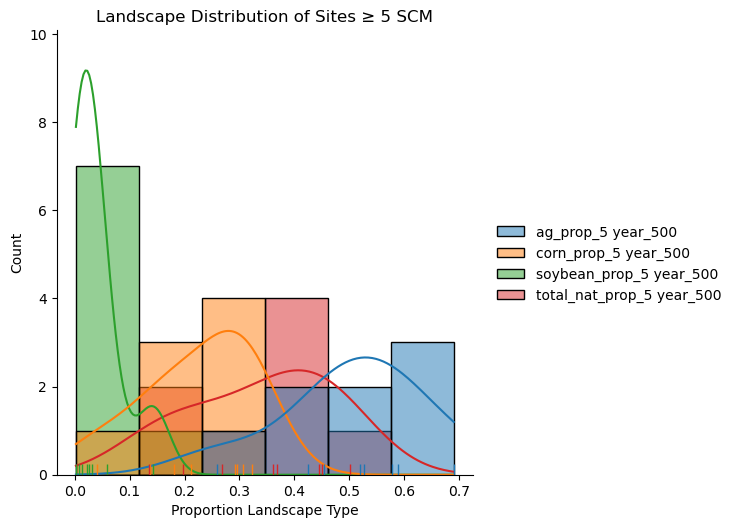

In [94]:
sns.displot(data=df, rug=True, kde=True)
plt.title("Landscape Distribution of Sites ≥ 5 SCM")
plt.xlabel("Proportion Landscape Type")
plt.ylabel("Count") 